In [1]:
# MNIST Handwritten Digits Classification with CNN
# Deep Learning using TensorFlow/Keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import random



In [2]:
# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)



TensorFlow version: 2.19.0
Keras version: 3.10.0


In [3]:
# Step 1: Load and Preprocess the MNIST Dataset
print("\n" + "=" * 60)
print("STEP 1: LOADING AND PREPROCESSING MNIST DATASET")
print("=" * 60)

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("Dataset loaded successfully!")
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Display dataset information
print(f"\nDataset Information:")
print(f"Pixel value range: [{X_train.min()}, {X_train.max()}]")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"Class distribution in training set: {np.bincount(y_train)}")





STEP 1: LOADING AND PREPROCESSING MNIST DATASET
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset loaded successfully!
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Dataset Information:
Pixel value range: [0, 255]
Number of classes: 10
Class distribution in training set: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]



STEP 2: DATA PREPROCESSING
Data preprocessing completed:
Training shape after reshaping: (60000, 28, 28, 1)
Test shape after reshaping: (10000, 28, 28, 1)
Normalized pixel range: [0.000, 1.000]
One-hot encoded labels shape: (60000, 10)

Visualizing sample training images...


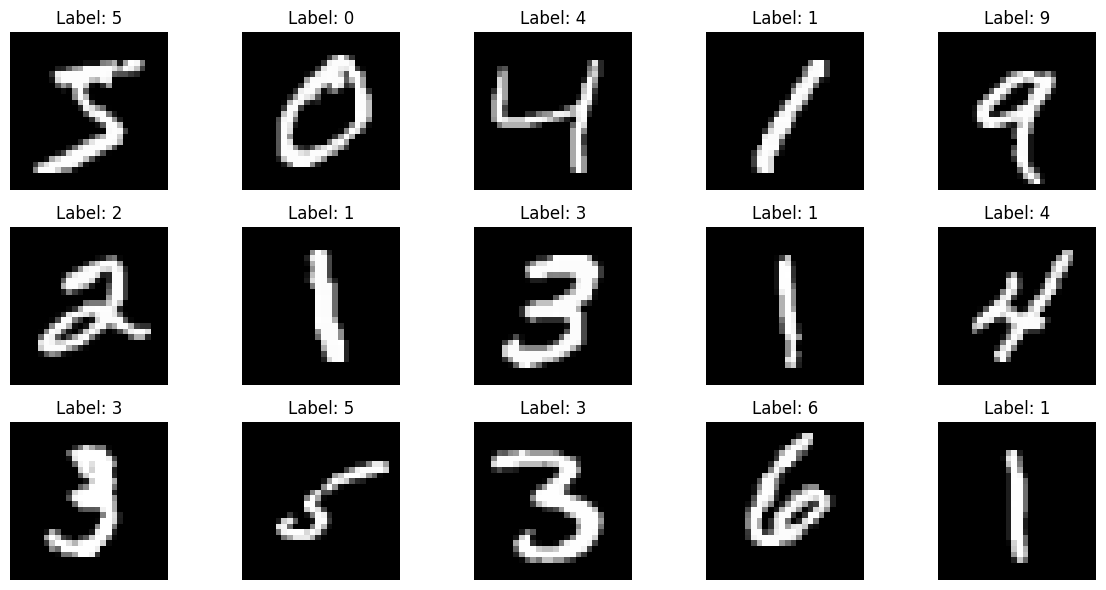

In [4]:
# Step 2: Data Preprocessing and Visualization
print("\n" + "=" * 60)
print("STEP 2: DATA PREPROCESSING")
print("=" * 60)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Data preprocessing completed:")
print(f"Training shape after reshaping: {X_train.shape}")
print(f"Test shape after reshaping: {X_test.shape}")
print(f"Normalized pixel range: [{X_train.min():.3f}, {X_train.max():.3f}]")

# Convert labels to categorical one-hot encoding
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print(f"One-hot encoded labels shape: {y_train_categorical.shape}")

# Visualize sample images from the dataset
print("\nVisualizing sample training images...")
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
# Step 3: Build the CNN Model Architecture
print("\n" + "=" * 60)
print("STEP 3: BUILDING CNN MODEL ARCHITECTURE")
print("=" * 60)

def create_cnn_model():
    """Create a CNN model for MNIST digit classification"""
    model = keras.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Dropout(0.25),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile the model
model = create_cnn_model()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("CNN Model Architecture:")
model.summary()




STEP 3: BUILDING CNN MODEL ARCHITECTURE


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,781,354 (6.80 MB)

 Trainable params: 1,780,138 (6.79 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [7]:
# Step 4: Train the Model
print("\n" + "=" * 60)
print("STEP 4: TRAINING THE CNN MODEL")
print("=" * 60)

# Define callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

print("Starting model training...")
history = model.fit(
    X_train, y_train_categorical,
    batch_size=128,
    epochs=5,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

print("Model training completed!")




STEP 4: TRAINING THE CNN MODEL
Starting model training...
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 281s 750ms/step - accuracy: 0.9856 - loss: 0.0481 - val_accuracy: 0.9892 - val_loss: 0.0393 - learning_rate: 0.0010
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 316s 735ms/step - accuracy: 0.9864 - loss: 0.0440 - val_accuracy: 0.9913 - val_loss: 0.0308 - learning_rate: 0.0010
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 277s 740ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9925 - val_loss: 0.0261 - learning_rate: 0.0010
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 277s 738ms/step - accuracy: 0.9895 - loss: 0.0348 - val_accuracy: 0.9927 - val_loss: 0.0269 - learning_rate: 0.0010
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 293s 782ms/step - accuracy: 0.9903 - loss: 0.0324 - val_accuracy: 0.9930 - val_loss: 0.0265 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
Model training completed!


In [8]:
# Step 5: Evaluate the Model
print("\n" + "=" * 60)
print("STEP 5: MODEL EVALUATION")
print("=" * 60)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nDetailed Evaluation Metrics:")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

# Check if we achieved the goal
if test_accuracy > 0.95:
    print("\n🎉 GOAL ACHIEVED: Test accuracy > 95%!")
else:
    print("\n⚠️  Goal not achieved. Consider tuning the model further.")




STEP 5: MODEL EVALUATION
Test Accuracy: 0.9933 (99.33%)
Test Loss: 0.0213
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step

Detailed Evaluation Metrics:
Precision (weighted): 0.9933
Recall (weighted): 0.9933
F1-Score (weighted): 0.9933

🎉 GOAL ACHIEVED: Test accuracy > 95%!



STEP 6: TRAINING HISTORY VISUALIZATION


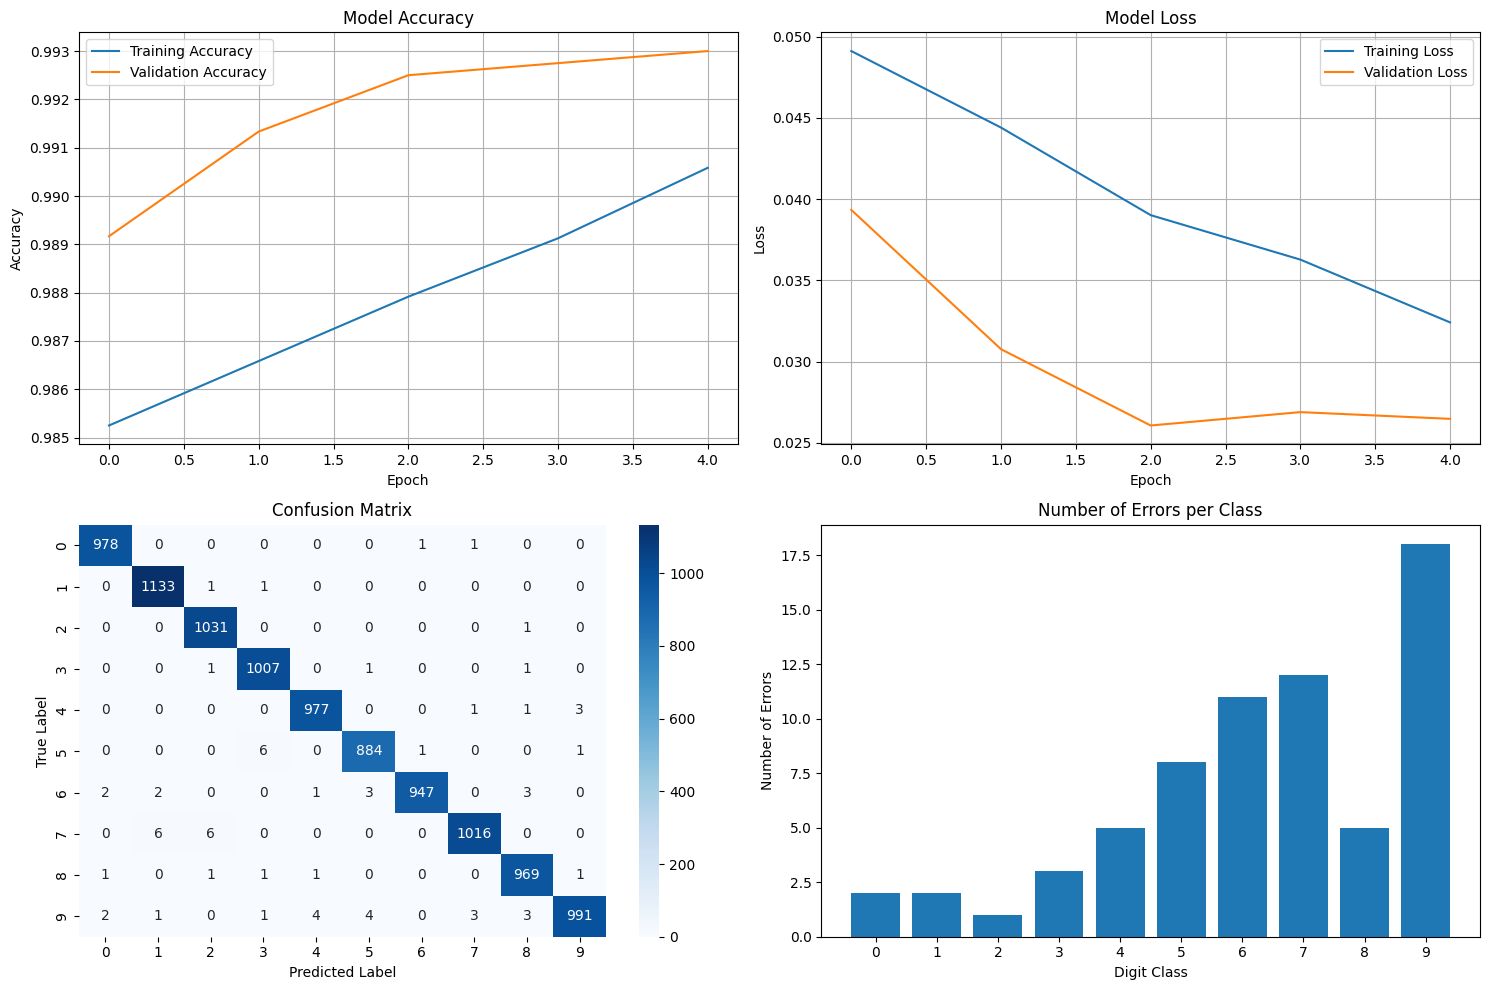

In [9]:
# Step 6: Visualize Training History
print("\n" + "=" * 60)
print("STEP 6: TRAINING HISTORY VISUALIZATION")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot training & validation accuracy
axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 0].set_title('Model Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot training & validation loss
axes[0, 1].plot(history.history['loss'], label='Training Loss')
axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 1].set_title('Model Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')

# Classification errors per class
errors_per_class = cm.sum(axis=1) - np.diag(cm)
axes[1, 1].bar(range(10), errors_per_class)
axes[1, 1].set_title('Number of Errors per Class')
axes[1, 1].set_xlabel('Digit Class')
axes[1, 1].set_ylabel('Number of Errors')
axes[1, 1].set_xticks(range(10))

plt.tight_layout()
plt.show()




STEP 7: VISUALIZING PREDICTIONS ON SAMPLE IMAGES


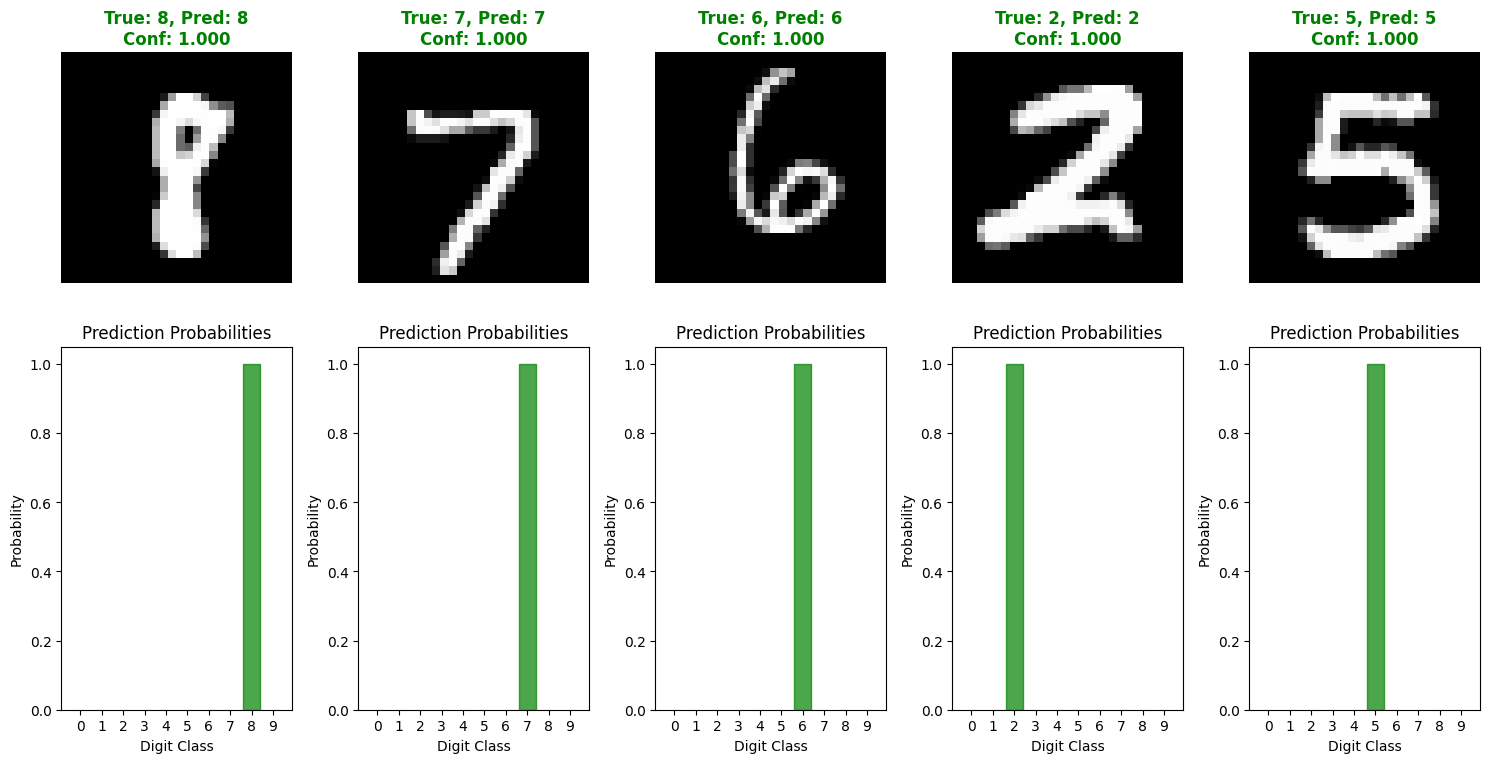

In [10]:
# Step 7: Visualize Predictions on Sample Images
print("\n" + "=" * 60)
print("STEP 7: VISUALIZING PREDICTIONS ON SAMPLE IMAGES")
print("=" * 60)

# Select 5 random samples from test set
sample_indices = random.sample(range(len(X_test)), 5)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    # Get the image and true label
    image = X_test[idx].reshape(28, 28)
    true_label = y_test[idx]

    # Make prediction
    prediction_proba = y_pred_proba[idx]
    predicted_label = y_pred[idx]
    confidence = prediction_proba[predicted_label]

    # Create subplot
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')

    # Color code: green for correct, red for incorrect
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f'True: {true_label}, Pred: {predicted_label}\nConf: {confidence:.3f}',
              color=color, fontweight='bold')
    plt.axis('off')

    # Show probability distribution
    plt.subplot(2, 5, i + 6)
    bars = plt.bar(range(10), prediction_proba, color=['red' if i == true_label else 'blue' for i in range(10)])
    plt.xticks(range(10))
    plt.title(f'Prediction Probabilities')
    plt.xlabel('Digit Class')
    plt.ylabel('Probability')

    # Highlight the predicted class
    bars[predicted_label].set_color('green' if true_label == predicted_label else 'red')
    bars[predicted_label].set_alpha(0.7)

plt.tight_layout()
plt.show()




STEP 8: ANALYZING MISCLASSIFIED EXAMPLES
Number of misclassified examples: 67
Error rate: 0.67%

Showing 5 misclassified examples:


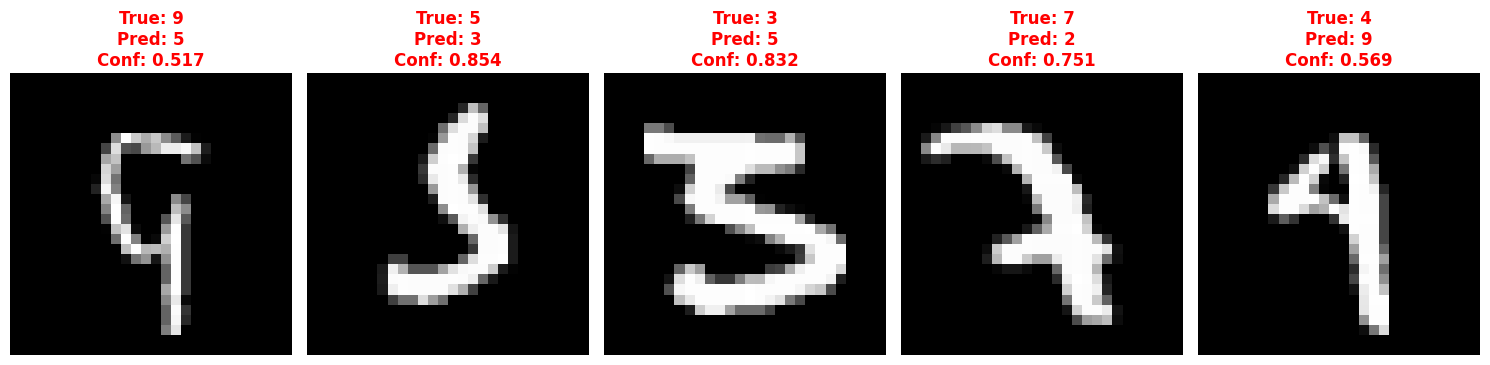

In [11]:
# Step 8: Analyze Misclassified Examples
print("\n" + "=" * 60)
print("STEP 8: ANALYZING MISCLASSIFIED EXAMPLES")
print("=" * 60)

# Find misclassified examples
misclassified_indices = np.where(y_pred != y_test)[0]

if len(misclassified_indices) > 0:
    print(f"Number of misclassified examples: {len(misclassified_indices)}")
    print(f"Error rate: {len(misclassified_indices)/len(y_test)*100:.2f}%")

    # Show some misclassified examples
    print("\nShowing 5 misclassified examples:")
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(misclassified_indices[:5]):
        image = X_test[idx].reshape(28, 28)
        true_label = y_test[idx]
        predicted_label = y_pred[idx]
        confidence = y_pred_proba[idx][predicted_label]

        plt.subplot(1, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.3f}',
                  color='red', fontweight='bold')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No misclassified examples found!")



In [12]:
# Step 9: Model Performance Summary
print("\n" + "=" * 60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("=" * 60)

print(f"🎯 Target: >95% Test Accuracy")
print(f"📊 Achieved: {test_accuracy*100:.2f}% Test Accuracy")

if test_accuracy > 0.95:
    print("✅ SUCCESS: Goal achieved!")
else:
    print("❌ GOAL NOT MET: Consider the following improvements:")
    print("   - Increase model complexity")
    print("   - Add data augmentation")
    print("   - Train for more epochs")
    print("   - Tune hyperparameters")

print(f"\n📈 Training Details:")
print(f"   - Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"   - Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"   - Number of Epochs Trained: {len(history.history['accuracy'])}")

print(f"\n🧮 Model Statistics:")
print(f"   - Total Parameters: {model.count_params():,}")
print(f"   - Misclassified Examples: {len(misclassified_indices)}")
print(f"   - Error Rate: {len(misclassified_indices)/len(y_test)*100:.2f}%")




FINAL MODEL PERFORMANCE SUMMARY
🎯 Target: >95% Test Accuracy
📊 Achieved: 99.33% Test Accuracy
✅ SUCCESS: Goal achieved!

📈 Training Details:
   - Final Training Accuracy: 0.9906
   - Final Validation Accuracy: 0.9930
   - Number of Epochs Trained: 5

🧮 Model Statistics:
   - Total Parameters: 1,781,354
   - Misclassified Examples: 67
   - Error Rate: 0.67%


In [14]:
# Step 10: Save the Model (Optional)
print("\n" + "=" * 60)
print("OPTIONAL: SAVING THE MODEL")
print("=" * 60)

#  save the model
model.save('mnist_cnn_model.h5')
print("Model saved as 'mnist_cnn_model.h5'")

print("\n" + "=" * 60)
print("SCRIPT EXECUTION COMPLETED!")
print("=" * 60)


OPTIONAL: SAVING THE MODEL
Model saved as 'mnist_cnn_model.h5'

SCRIPT EXECUTION COMPLETED!
